In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
customers = pd.read_csv('customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


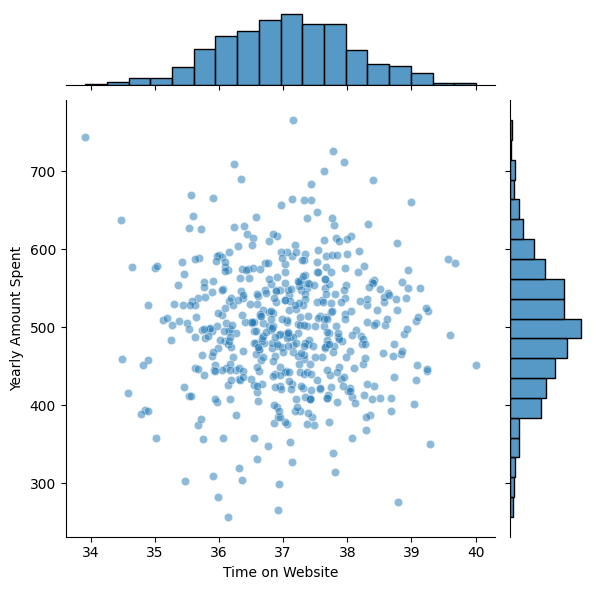

In [14]:
# time on webiste vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = customers, alpha=0.5)

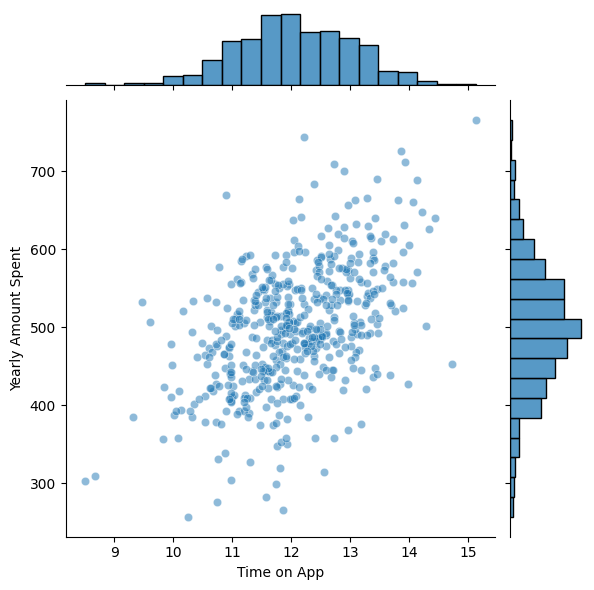

In [15]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data = customers, alpha=0.5)

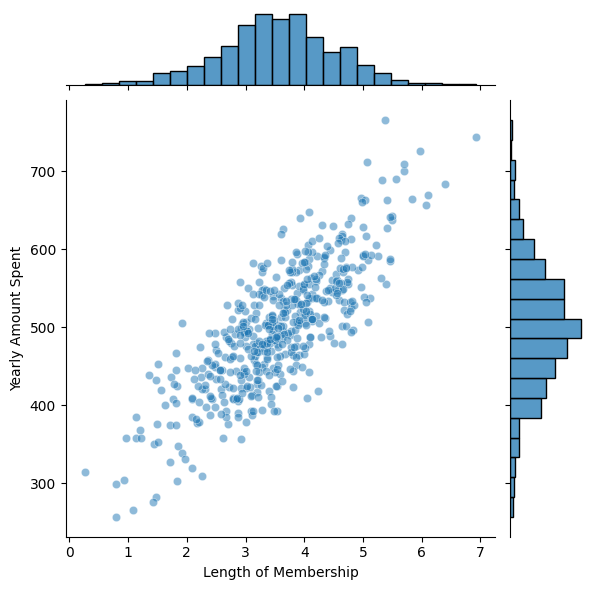

In [ ]:
# time on app vs yearly amount spent
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data = customers, alpha=0.5)

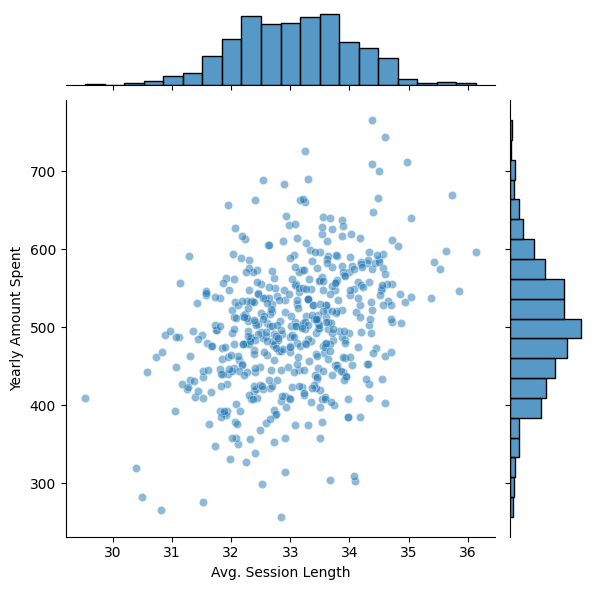

In [ ]:
# Avg. Session Length vs yearly amount spent
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data = customers, alpha=0.5)

In [18]:
from sklearn.model_selection import train_test_split
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [19]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [20]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [29]:
lm.intercept_

np.float64(-1050.6536746645725)

In [31]:
# R^2 score on the test data
r2 = lm.score(X_test, y_test)
print(f'R^2 score on the test data: ',r2)

R^2 score on the test data:  0.9808757641125855


In [32]:
# the coeffients in the data frame
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
Avg. Session Length     25.724256
Time on App             38.597135
Time on Website          0.459148
Length of Membership    61.674732


In [35]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)  # Adds the intercept term
model = sm.OLS(y_train, X_train_const)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Fri, 13 Jun 2025   Prob (F-statistic):          3.46e-315
Time:                         02:14:47   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [37]:
# making the predictions
prediction = lm.predict([[34.497268,12.655651,39.577668,4.082621]])
print(f'Predicted Yearly Amount Spent: {prediction[0]}')

Predicted Yearly Amount Spent: 595.2013219596965


c:\Users\AL-MAKKAH\OneDrive\Desktop\machine-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
